In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.set_theme(style="whitegrid")

In [10]:
""" 
Visualize results from embeddings of models with speed features included
"""
path = r'' # use your path
all_files = glob.glob(os.path.join("./results" , "full_evaluation_speed/*.csv"))

dfs = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dfs.append(df)


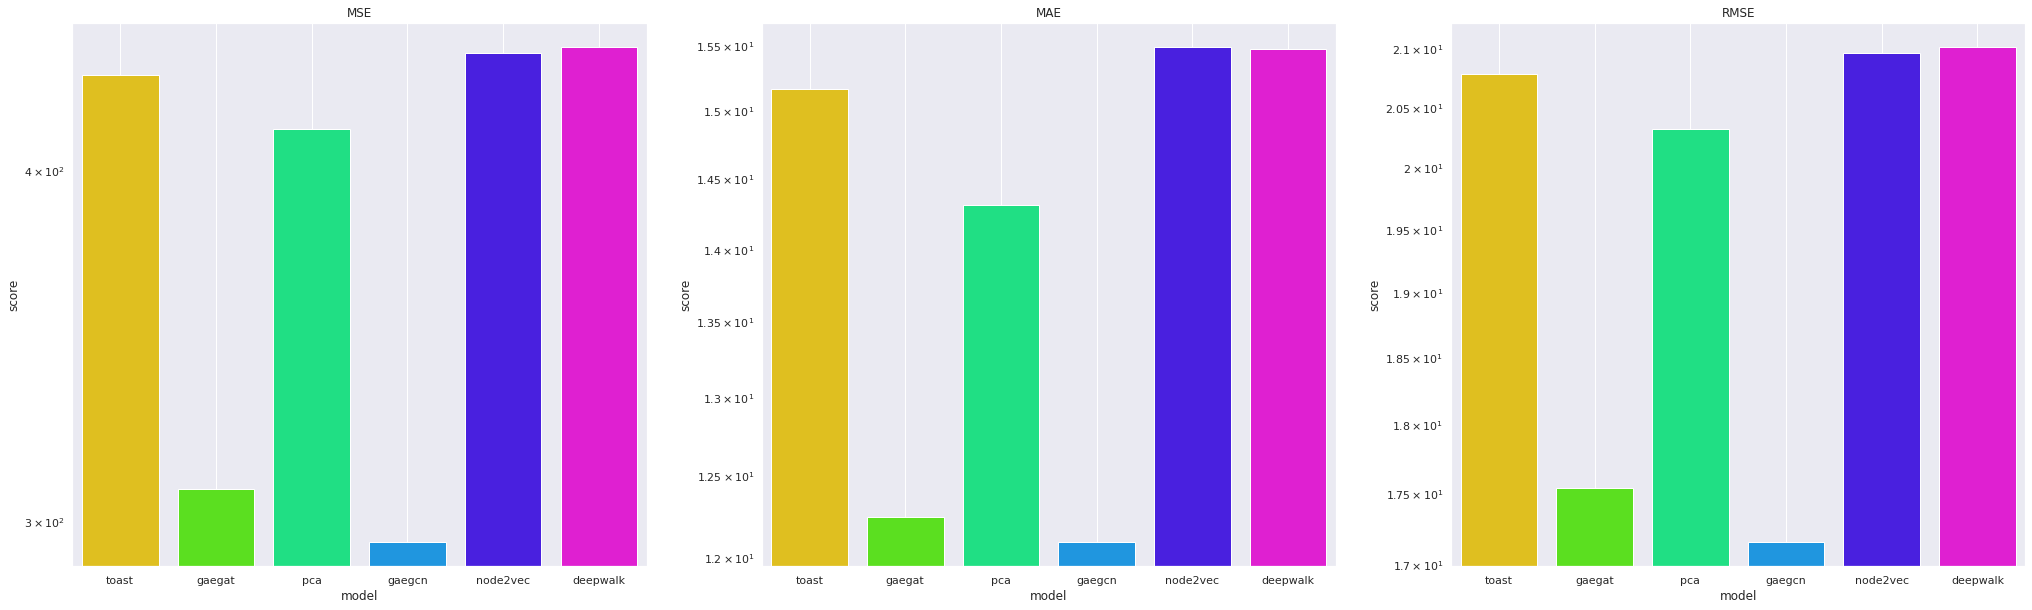

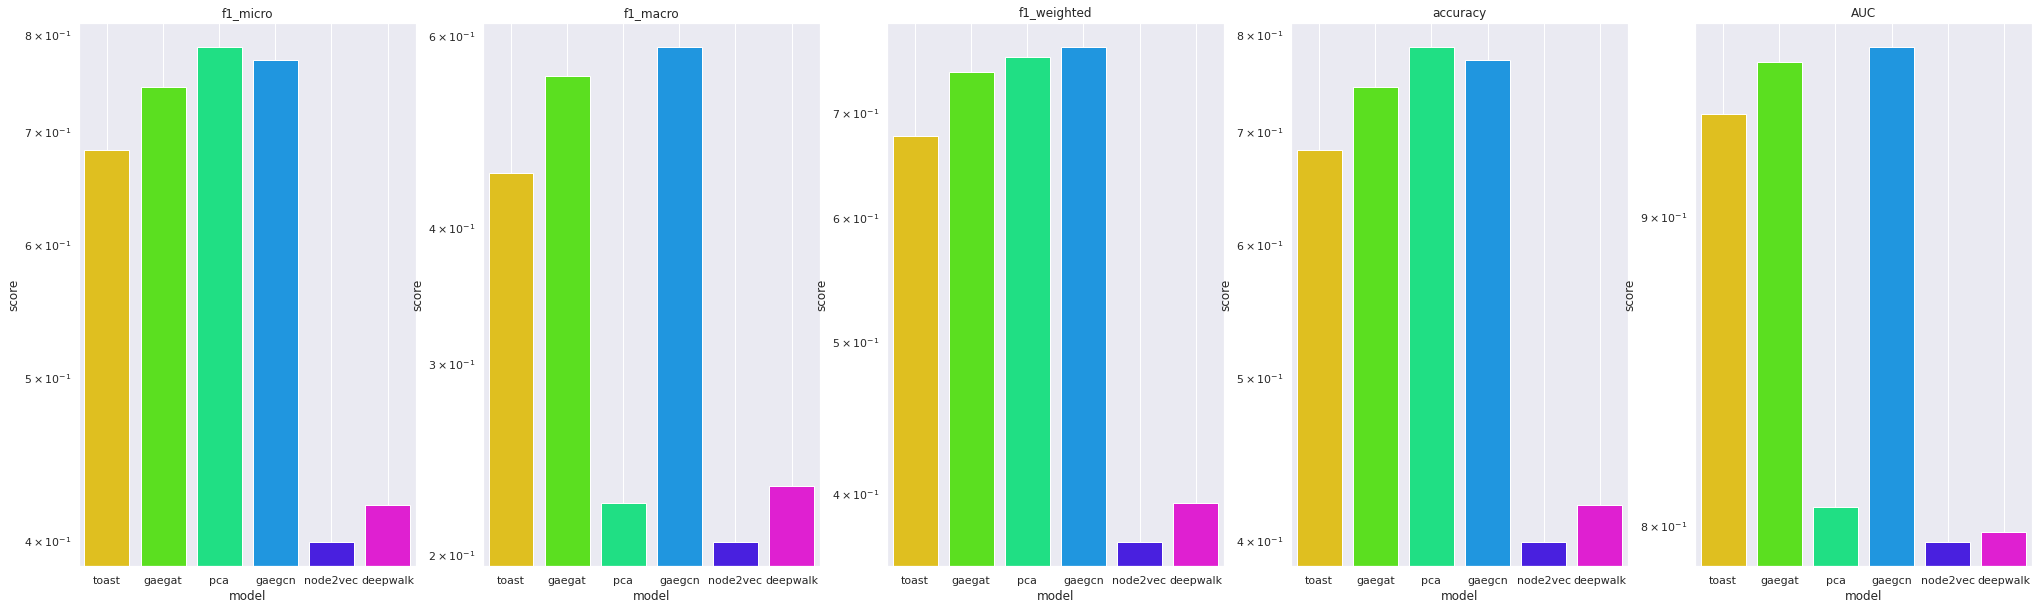

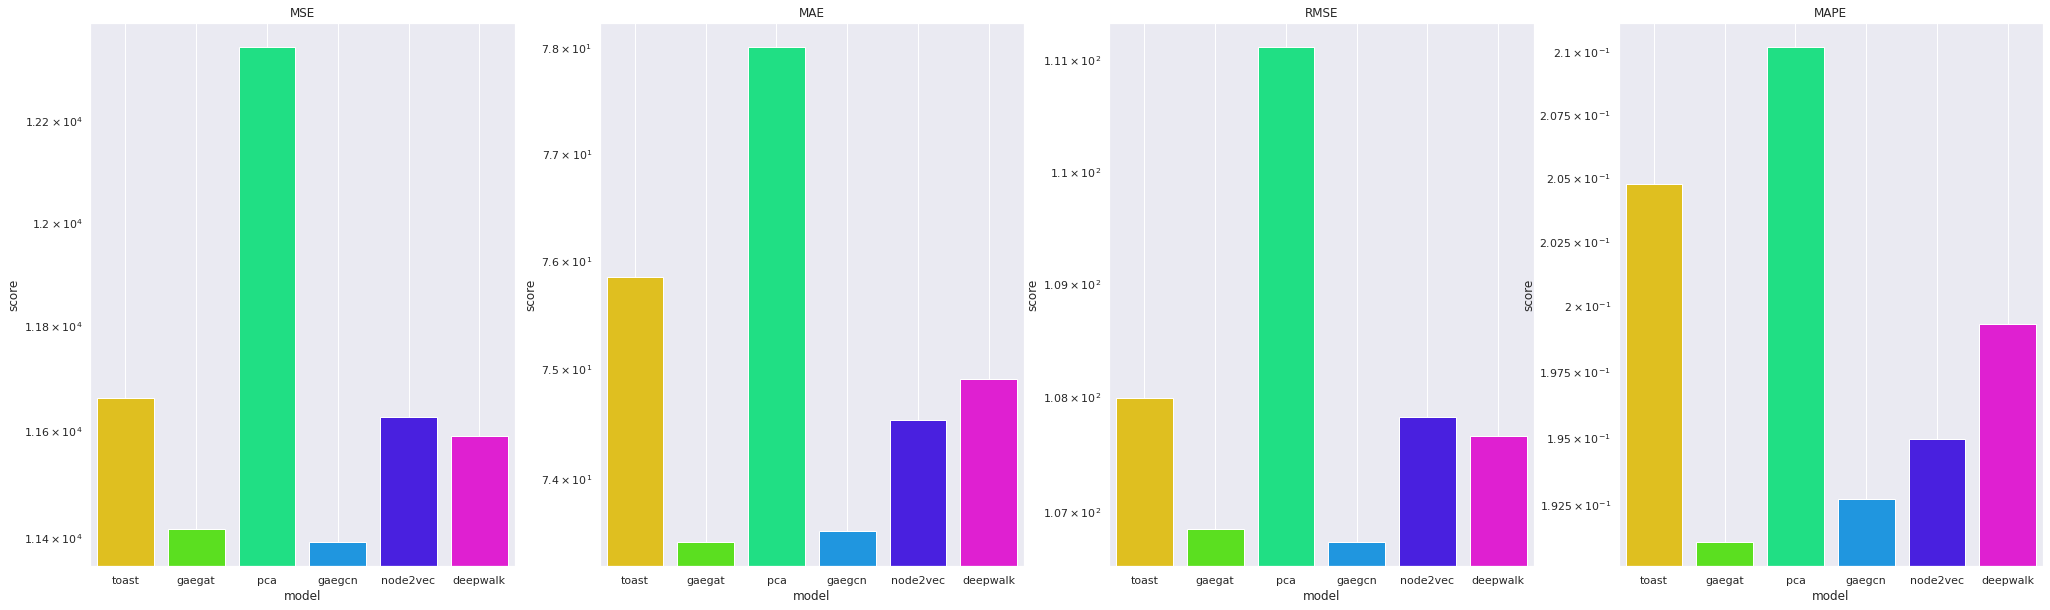

In [63]:
sns.set_style("darkgrid")

for df in dfs:
    # convert to barplot friendly format
    df = df.set_index("model").stack().reset_index().rename(columns={"level_1": "score_func", 0: "score"})
    score_funcs = df["score_func"].unique()
    fig, ax = plt.subplots(1, len(score_funcs), figsize=(35,10))
    for i, sf in enumerate(score_funcs):
        g = sns.barplot(
            data=df[df["score_func"]==sf], 
            x="model", y="score",
            ci="sd", palette="hsv", alpha=1, ax=ax[i]
        )
        g.set_yscale("log")
        g.set_title(sf)
        ax[i].grid()
        #g.despine(left=True)
        #g.set_axis_labels("score function", "score")

In [4]:
"""
Analysis of k-evaluation
"""
all_files = glob.glob(os.path.join("./results" , "gtc_k_eva/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    df["k"] = df['model'].str.split('_').str[2]
    df["type"] = df['model'].str.split('_').str[3]
    dfs.append(df)

./results/gtc_k_eva/roadclf.csv
./results/gtc_k_eva/meanspeed.csv
./results/gtc_k_eva/nextlocation.csv


<AxesSubplot:xlabel='k', ylabel='accuracy'>

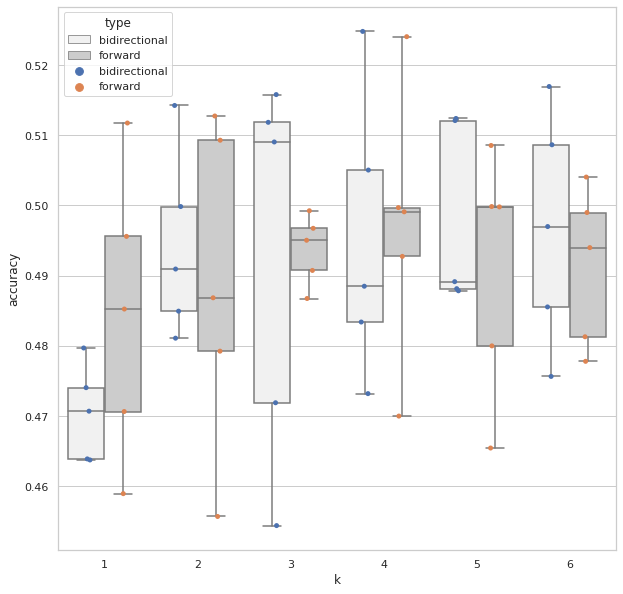

In [8]:
import numpy as np
# v = dfs[-1].groupby(["type", "k"])["MAE"].agg(["mean", "var"]).reset_index()
# v["mean"] = v["mean"].round(3)
# print(v.to_latex())
fig = plt.figure(figsize=(10,10))
sns.boxplot(x="k", y="accuracy", hue="type", data=dfs[-1], whis=np.inf, color=".8")
sns.stripplot(x="k", y="accuracy", hue="type", data=dfs[-1], dodge=True)

In [2]:
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtn_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtn_ablation/meanspeed.csv
./results/gtn_ablation/destination.csv
./results/gtn_ablation/traveltime.csv
./results/gtn_ablation/nextlocation.csv
./results/gtn_ablation/roadclf.csv


[Text(0, 0, '0.593'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.58'),
 Text(0, 0, '0.592')]

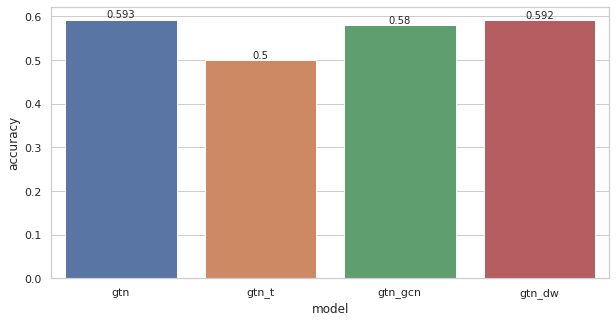

In [4]:
plt.figure(figsize=(10,5))
df = dfs[-2]
df["accuracy"] = df["accuracy"].round(3)
ax = sns.barplot(x="model", y="accuracy", data=df)
ax.bar_label(ax.containers[0])
# ax.set(ylim=(10, 15))

In [10]:
""" 
Ablation Study GTC & Traj2vec
"""
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtc_traj2vec_ablation/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtc_traj2vec_ablation/meanspeed.csv
./results/gtc_traj2vec_ablation/nextlocation.csv
./results/gtc_traj2vec_ablation/destination.csv
./results/gtc_traj2vec_ablation/timetravel.csv
./results/gtc_traj2vec_ablation/roadclf.csv


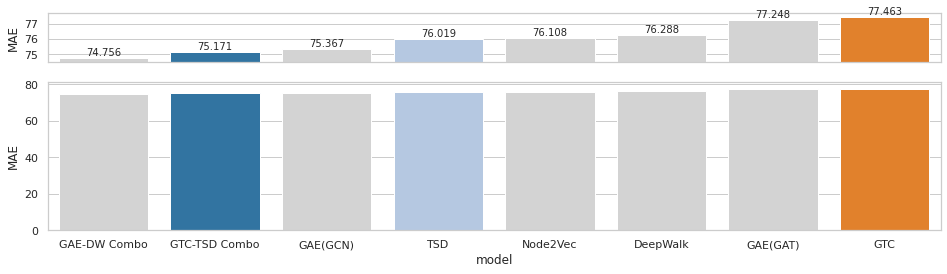

In [37]:
idx = -2
metric = "MAE"
df = dfs[idx].round(3)
colors = sns.color_palette(palette="tab20", n_colors=3)
df.sort_values(metric, inplace=True, ascending=True)
fig, ax = plt.subplots(2, 1, figsize=(16,4), gridspec_kw={'height_ratios': [1, 3]})
color_map = {"con-traj2vec-gtc": colors[0], "traj2vec": colors[1], "gtc": colors[2]}
clrs = [color_map[x] if x in ["con-traj2vec-gtc", "traj2vec", "gtc"] else 'lightgrey' for x in df["model"]]
df["model"].replace({'gtc': 'GTC', 'gaegcn': 'GAE(GCN)', 'traj2vec': 'TSD', 'gaegat': 'GAE(GAT)', 'node2vec': 'Node2Vec', 'deepwalk': 'DeepWalk', 'con-traj2vec-gtc': 'GTC-TSD Combo', 'con-deepwalk-gaegcn': 'GAE-DW Combo'}, inplace=True)
sns.barplot(x="model", y=metric, data=df, palette=clrs, ax=ax[1])
sns.barplot(x="model", y=metric, data=df, palette=clrs, ax=ax[0])
# ax[0].set_yticklabels([])
# ax[0].set_xticklabels([])
diff = df[metric].max() - df[metric].min()
ax[0].set_ylim([df[metric].min() - 0.1*diff, df[metric].max() + 0.1*diff])
#ax[1].set_ylim([0, df[metric].max() + 0.1*diff])
ax[0].axes.xaxis.set_visible(False)
# ax[0].axes.yaxis.set_visible(False)
ax[0].bar_label(ax[0].containers[0])
types = ["Convolution", "Walk", "Concatination"]
#fig.tight_layout()

In [19]:
""" 
Trajectory feature study gtc 
"""
# Ablation plots
all_files = glob.glob(os.path.join("./results" , "gtc_feature_eval/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/gtc_feature_eval/roadclf.csv
./results/gtc_feature_eval/meanspeed.csv
./results/gtc_feature_eval/destination.csv
./results/gtc_feature_eval/nextlocation.csv
./results/gtc_feature_eval/traveltime.csv


[Text(0, 0, '76.793'),
 Text(0, 0, '76.561'),
 Text(0, 0, '76.387'),
 Text(0, 0, '76.724')]

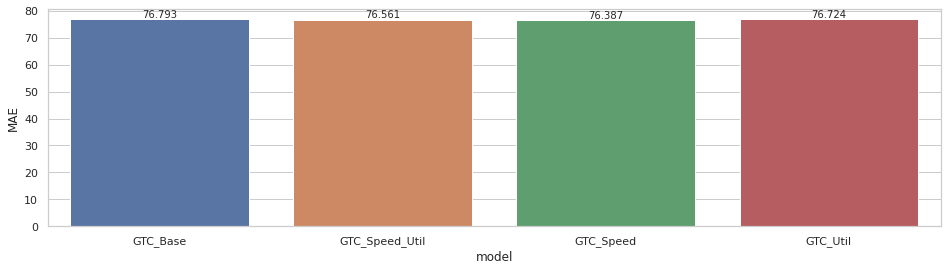

In [30]:
df = dfs[-1]
df = df.round(3)
df.rename(columns={"Unnamed: 0": "model"}, inplace=True)
# dfs[0].sort_values("accuracy", inplace=True, ascending=False)
df["model"].replace({'gtc_roadclf': 'GTC_Base', 'gtc_roadclf_traj_all': 'GTC_Speed_Util', 'gtc_roadclf_traj_speed': 'GTC_Speed', 'gtc_roadclf_traj_util': 'GTC_Util', 'gtc_base': 'GTC_Base', 'gtc_base_traj_all': 'GTC_Speed_Util', 'gtc_base_traj_speed': 'GTC_Speed', 'gtc_base_traj_util': 'GTC_Util'}, inplace=True)
fig, ax = plt.subplots(1, 1, sharey=True, figsize=(16,4))
sns.barplot(x="model", y="MAE", data=df, ax=ax)
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="conv"], palette="viridis", ax=ax[0])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="walk"], palette="viridis", ax=ax[1])
# sns.barplot(x="model", y="f1_macro", data=dfs[0][dfs[0]["type"]=="concatination"], palette="viridis", ax=ax[2])
ax.bar_label(ax.containers[0])
# ax.set(ylim=(13,13.5))

In [21]:
"""
Generate main result tables
"""
all_files = glob.glob(os.path.join("./results" , "final_eva_porto/*.csv"))

dfs = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    print(filename)
    dfs.append(df)

./results/final_eva_porto/roadclf.csv
./results/final_eva_porto/meanspeed.csv
./results/final_eva_porto/nextlocation.csv
./results/final_eva_porto/destination.csv
./results/final_eva_porto/timetravel.csv


In [22]:
cols =  ["MAE", "RMSE"] # ["f1_macro", "accuracy", "f1_weighted"]
df = dfs[-1]
df = df.groupby("Unnamed: 0")[cols].agg(["mean", "std"]).reset_index()
df = df.reindex([6, 0, 5, 2, 1, 7, 8, 4, 9, 3])
df = df.round(3)
df.columns = df.columns.map('|'.join).str.strip('|')
for c in cols:
    df[c] = df[f"{c}|mean"].astype(str) + " pm " + df[f"{c}|std"].astype(str)

df = df[["Unnamed: 0"] + cols]

# df = df[["Unnamed: 0", "f1_macro", "accuracy", "AUC"]] # roadclf
# df = df[["Unnamed: 0", "MAE", "RMSE", "MSE"]]

print(df.to_latex(index=False))

\begin{tabular}{lll}
\toprule
Unnamed: 0 &             MAE &             RMSE \\
\midrule
       pca & 93.405 pm 1.693 &   129.516 pm 1.7 \\
  deepwalk & 76.778 pm 0.876 & 110.633 pm 1.272 \\
  node2vec &  76.764 pm 1.25 & 110.771 pm 1.306 \\
    gaegcn & 75.894 pm 0.574 & 109.481 pm 0.856 \\
    gaegat &  76.67 pm 1.315 & 109.639 pm 1.046 \\
       rfn & 79.292 pm 1.141 & 112.554 pm 1.495 \\
   srn2vec & 75.199 pm 0.918 & 108.721 pm 1.732 \\
      hrnr &   77.989 pm 0.8 & 112.726 pm 2.192 \\
     toast &  76.34 pm 0.717 & 110.205 pm 1.121 \\
       gtn &  74.985 pm 0.64 & 108.683 pm 0.673 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_17192/39565525.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [23]:
porto = glob.glob(os.path.join("./results" , "final_eva_porto/*.csv"))
sf = glob.glob(os.path.join("./results" , "final_eva_sf/*.csv"))
ha = glob.glob(os.path.join("./results" , "final_eva_hanover/*.csv"))
porto.sort()
sf.sort()
ha.sort()
print(porto,sf,ha)
dfs = []
for p, s, h in zip(porto, sf, ha):
    df_p = pd.read_csv(p, index_col=None, header=0)
    df_s = pd.read_csv(s, index_col=None, header=0)
    df_h = pd.read_csv(h, index_col=None, header=0)

    dfs.extend([df_p, df_s, df_h])

['./results/final_eva_porto/destination.csv', './results/final_eva_porto/meanspeed.csv', './results/final_eva_porto/nextlocation.csv', './results/final_eva_porto/roadclf.csv', './results/final_eva_porto/timetravel.csv'] ['./results/final_eva_sf/destination.csv', './results/final_eva_sf/meanspeed.csv', './results/final_eva_sf/nextlocation.csv', './results/final_eva_sf/roadclf.csv', './results/final_eva_sf/timetravel.csv'] ['./results/final_eva_hanover/destination.csv', './results/final_eva_hanover/meanspeed.csv', './results/final_eva_hanover/nextlocation.csv', './results/final_eva_hanover/roadclf.csv', './results/final_eva_hanover/timetravel.csv']


In [24]:
# calculate generalization scores
tasks = ["desti", "mean", "next", "road", "traveltime"]
cols = ["MAE", "f1_macro", "accuracy"]
scores = pd.DataFrame(0, index=["pca", "deepwalk", "node2vec", "gaegcn", "gaegat", "rfn", "srn2vec", "hrnr", "toast", "gtn"], columns=["score_desti", "score_mean", "score_next", "score_road", "score_traveltime"])
scores.sort_index(inplace=True)

for i in range(0, len(dfs)-2, 3):
    for df in dfs[i:i+3]:
        coloi = None
        for col in cols:
            if i > 8 and i < 12:
                coloi = "f1_macro"
            elif col in df:
                coloi = col
        print(coloi)
        df = df.groupby("Unnamed: 0")[coloi].agg(["mean"])
        df.sort_index(inplace=True)
        #print(df)
        score = (df["mean"]-df["mean"].min())/(df["mean"].max()-df["mean"].min())
        #print(score)
        score = 1 - score if coloi == "MAE" else score
        scores[f"score_{tasks[i//3]}"] = scores[f"score_{tasks[i//3]}"].values + score


scores /= 3

scores["overall"] = scores.mean(axis=1)
columns_titles = ["score_road", "score_mean", "score_traveltime", "score_next", "score_desti", "overall"]
scores=scores.reindex(columns=columns_titles)
scores = scores.round(3)
scores




accuracy
accuracy
accuracy
MAE
MAE
MAE
accuracy
accuracy
accuracy
f1_macro
f1_macro
f1_macro
MAE
MAE
MAE


,score_road,score_mean,score_traveltime,score_next,score_desti,overall
deepwalk,0.351,0.278,0.687,0.766,0.878,0.592
gaegat,0.509,0.407,0.580,0.631,0.568,0.539
gaegcn,0.469,0.401,0.686,0.548,0.368,0.494
gtn,1.000,1.000,0.946,0.780,0.946,0.934
hrnr,0.176,0.468,0.559,0.802,0.754,0.552
node2vec,0.313,0.325,0.658,0.791,0.901,0.597
pca,0.152,0.357,0.362,0.000,0.000,0.174
rfn,0.110,0.257,0.478,0.773,0.428,0.409
srn2vec,0.010,0.000,0.576,0.520,0.731,0.367
toast,0.127,0.345,0.615,0.613,0.723,0.485


In [27]:
9//3

3